<a href="https://colab.research.google.com/github/tsaoxieling/python2020/blob/main/%E3%80%8C%E5%B0%87%E5%9C%96%E7%89%87%E6%88%96%E5%BD%B1%E7%89%87%E7%B6%B2%E5%9D%80%E8%BD%89%E6%8F%9B%E6%88%90%E5%8D%A1%E9%80%9A%E9%A2%A8%E6%A0%BC_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# **下面這儲存格只要執行一次就可以了**


---



In [1]:
import os
repo = "CartoonGan-tensorflow"
!git clone https://github.com/mnicnc404/{repo}.git
os.chdir(os.path.join(repo))
!ls | grep cartoonize.py
from IPython.display import clear_output, display, Image
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install
clear_output()
import tensorflow as tf
tf.__version__

'2.3.0'

---

# 請在這邊把想要使用的網址填入!!!!

---







In [2]:
image_url = 'https://raw.githubusercontent.com/tsaoxieling/python2020/main/87.png'  #@param {type: "string"}

#範例gif:  https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif
#範例png:  https://n.sinaimg.cn/sinakd10118/341/w650h491/20200821/7923-iyaiihk8459061.png

In [3]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")

import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}
# a trick to show gif in notebook
if ".gif" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}
if ".png" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}

--2020-12-08 06:39:16--  https://raw.githubusercontent.com/tsaoxieling/python2020/main/87.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 745713 (728K) [image/png]
Saving to: ‘87.png’

87.png              100%[===================>] 728.24K  --.-KB/s    in 0.03s   

2020-12-08 06:39:17 (22.7 MB/s) - ‘87.png’ saved [745713/745713]





---
# **顯示使用的gif或png**



---



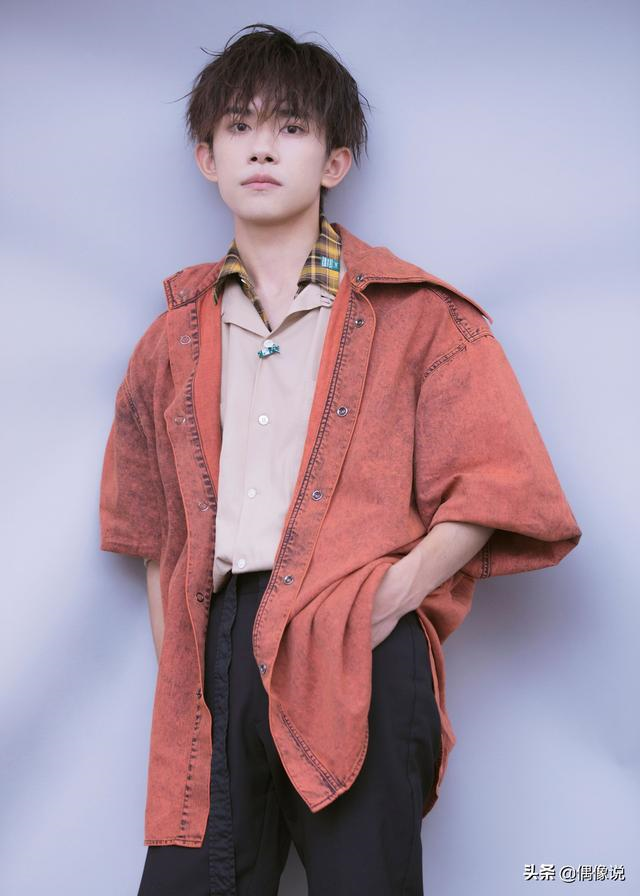

In [4]:
display(Image(png_path))



---

# **選擇要轉換的風格種類**

shinkai:新海誠

hayao:宮崎駿

hosoda:細田守

paprika:甜椒花

---



In [5]:
styles = "shinkai" #@param ["shinkai", "hayao", "hosoda", "paprika"]

In [6]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal
clear_output()

In [7]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)



---

# **顯示成果**



---



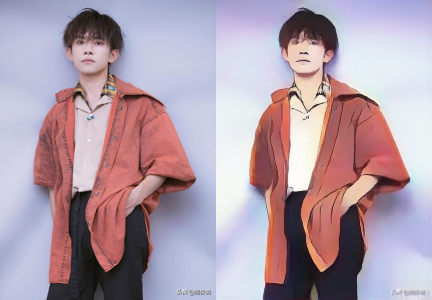

In [8]:
display(Image(result_path))